<a href="https://colab.research.google.com/github/alonsosilvaallende/COVID-19/blob/master/COVID_19_Italy_deaths_peak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [2]:
new_deaths_raw = pd.read_csv("https://covid.ourworldindata.org/data/ecdc/new_deaths.csv", \
                             index_col='date')
new_deaths_raw[["Italy", "Spain"]].tail(3)

,Italy,Spain
date,,
2020-04-03,760,950
2020-04-04,764,932
2020-04-05,681,809


In [0]:
TIPPING_POINT = 10

In [0]:
list_countries = ['Italy', 'Spain']

In [0]:
new_deaths = {}
for country in list_countries:
  index_ = new_deaths_raw[country][new_deaths_raw[country] > TIPPING_POINT].keys()[0]
  new_deaths[country] = new_deaths_raw[country][index_:]

In [0]:
Italy_lockdown = '2020-03-10'
Italy_closes_schools = '2020-03-05'
Italy_max = new_deaths["Italy"].keys()[new_deaths["Italy"].argmax()]

In [0]:
Spain_lockdown = '2020-03-15'
Spain_max = new_deaths["Spain"].keys()[new_deaths["Spain"].argmax()]

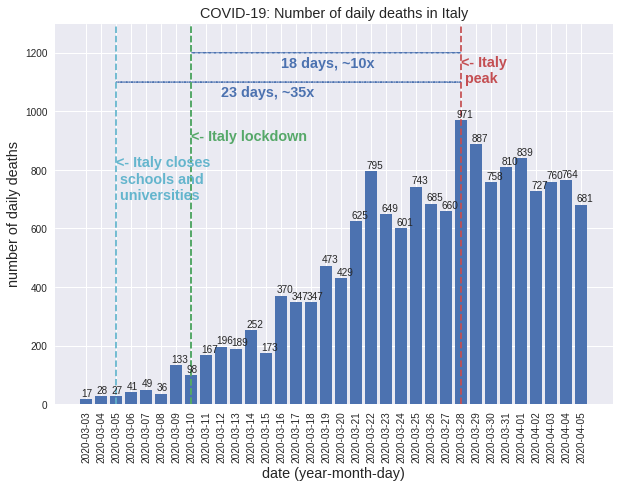

In [8]:
fig, ax = plt.subplots(figsize=(10,7))
plt.bar(new_deaths['Italy'].index, new_deaths['Italy'])
for i, val in enumerate(new_deaths['Italy']):
  ax.text(i-0.3, val+10, str(int(val)))
plt.axvline(Italy_closes_schools, color='C5', linestyle='dashed')
plt.axvline(Italy_lockdown, color='C1', linestyle='dashed')
plt.axvline(Italy_lockdown, color='C1', linestyle='dashed')
plt.axvline(Italy_max, color='C2', linestyle='dashed')
plt.arrow((pd.to_datetime(Italy_closes_schools)-pd.to_datetime(new_deaths["Italy"].keys()[0])).days, 1100, \
          (pd.to_datetime(Italy_max)-pd.to_datetime(Italy_closes_schools)).days, 0, head_width=1, head_length=1, linewidth=1, linestyle='dashed', color='C6', length_includes_head=True)
plt.arrow((pd.to_datetime(Italy_lockdown)-pd.to_datetime(new_deaths["Italy"].keys()[0])).days, 1200, \
          (pd.to_datetime(Italy_max)-pd.to_datetime(Italy_lockdown)).days, 0, \
          head_width=1, head_length=1, linewidth=1, linestyle='dashed', color='C6', length_includes_head=True)

plt.annotate('<- Italy closes\n schools and\n universities', (Italy_closes_schools,700.0), color='C5', fontsize='x-large', fontweight='bold')
plt.annotate('<- Italy lockdown', (Italy_lockdown,900.0), color='C1', fontsize='x-large', fontweight='bold')
plt.annotate('<- Italy\n peak', (Italy_max,1100.0), color='C2', fontsize='x-large', fontweight='bold')

# plt.annotate('<- Italia cierra\n escuelas y\n universidades', (Italy_closes_schools,700.0), color='C5', fontsize='x-large', fontweight='bold')
# plt.annotate('<- Confinamiento\n de Italia', (Italy_lockdown,900.0), color='C1', fontsize='x-large', fontweight='bold')
# plt.annotate('<- Cima\n para Italia', (Italy_max,1100.0), color='C2', fontsize='x-large', fontweight='bold')

# plt.annotate('17 days, ~25x', (9, 920), color='C6', fontsize='x-large', fontweight='bold')
# plt.annotate('12 days, ~8x', (13, 805), color='C6', fontsize='x-large', fontweight='bold')

plt.annotate(f'{(pd.to_datetime(Italy_max)-pd.to_datetime(Italy_closes_schools)).days} days, ~35x', (9, 1050), color='C6', fontsize='x-large', fontweight='bold')
plt.annotate(f'{(pd.to_datetime(Italy_max)-pd.to_datetime(Italy_lockdown)).days} days, ~10x', (13, 1150), color='C6', fontsize='x-large', fontweight='bold')

# plt.annotate(f'{(pd.to_datetime(Italy_max)-pd.to_datetime(Italy_closes_schools)).days} días, ~35x', (9, 1050), color='C6', fontsize='x-large', fontweight='bold')
# plt.annotate(f'{(pd.to_datetime(Italy_max)-pd.to_datetime(Italy_lockdown)).days} días, ~10x', (13, 1150), color='C6', fontsize='x-large', fontweight='bold')

plt.xticks(rotation=90)
plt.ylim(0,1300)
ax.set_title(f'COVID-19: Number of daily deaths in Italy', fontsize='x-large')
ax.set_xlabel(f'date (year-month-day)', fontsize='x-large')
ax.set_ylabel(f'number of daily deaths', fontsize='x-large')
# ax.set_title(f'COVID-19: Número de muertes diarias en Italia', fontsize='x-large')
# ax.set_xlabel(f'fecha (año-mes-día)', fontsize='x-large')
# ax.set_ylabel(f'número de muertes diarias', fontsize='x-large')
plt.savefig("2020-03-24-COVID-19-Cima-Muertes-Italia.png", format='png', dvi=500)
# plt.show()

In [0]:
from google.colab import files
files.download("2020-03-24-COVID-19-Cima-Muertes-Italia.png")

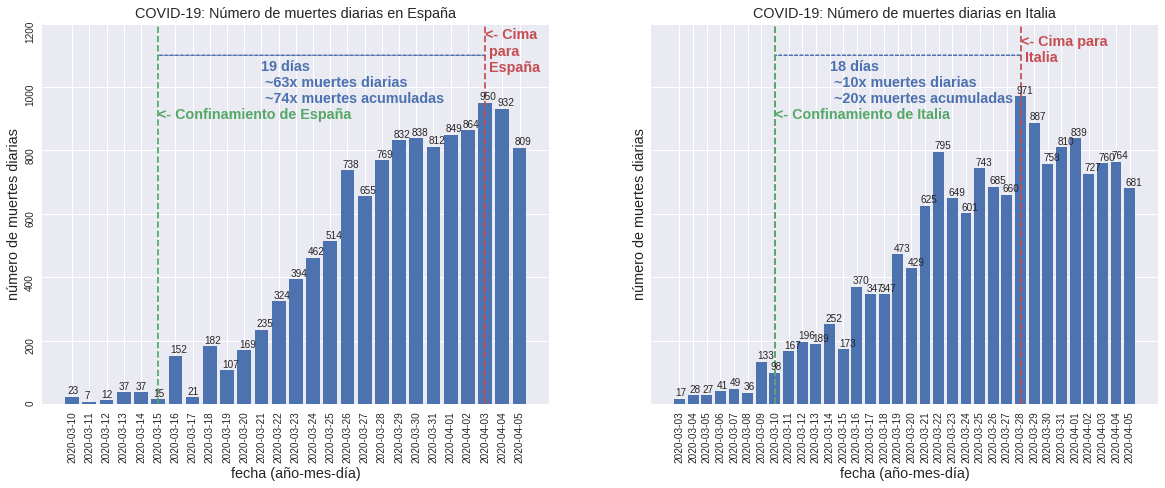

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20,7))

ax1.bar(new_deaths['Spain'].index, new_deaths['Spain'])
for i, val in enumerate(new_deaths['Spain']):
  ax1.text(i-0.3, val+10, str(int(val)))

ax1.axvline(Spain_lockdown, color='C1', linestyle='dashed')
ax1.axvline(Spain_max, color='C2', linestyle='dashed')

# plt.arrow((pd.to_datetime(Italy_closes_schools)-pd.to_datetime(new_deaths["Italy"].keys()[0])).days, 1100, \
#          (pd.to_datetime(Italy_max)-pd.to_datetime(Italy_closes_schools)).days, 0, head_width=1, head_length=1, linewidth=1, linestyle='dashed', color='C6', length_includes_head=True)
ax1.arrow((pd.to_datetime(Spain_lockdown)-pd.to_datetime(new_deaths["Spain"].keys()[0])).days, 1100, \
          (pd.to_datetime(Spain_max)-pd.to_datetime(Spain_lockdown)).days, 0, \
          head_width=1, head_length=1, linewidth=1, linestyle='dashed', color='C6', length_includes_head=True)

# ax1.annotate('<- Spain lockdown', (Spain_lockdown,900.0), color='C1', fontsize='x-large', fontweight='bold')
# ax1.annotate('<- Spain\n peak', (Spain_max,1080.0), color='C2', fontsize='x-large', fontweight='bold')
ax1.annotate('<- Confinamiento de España', (Spain_lockdown,900.0), color='C1', fontsize='x-large', fontweight='bold')
ax1.annotate('<- Cima\n para\n España', (Spain_max,1050.0), color='C2', fontsize='x-large', fontweight='bold')

# plt.annotate('<- Italia cierra\n escuelas y\n universidades', (Italy_closes_schools,700.0), color='C5', fontsize='x-large', fontweight='bold')
# plt.annotate('<- Confinamiento\n de Italia', (Italy_lockdown,900.0), color='C1', fontsize='x-large', fontweight='bold')
# plt.annotate('<- Cima\n para Italia', (Italy_max,1100.0), color='C2', fontsize='x-large', fontweight='bold')

# plt.annotate('17 days, ~25x', (9, 920), color='C6', fontsize='x-large', fontweight='bold')
# plt.annotate('12 days, ~8x', (13, 805), color='C6', fontsize='x-large', fontweight='bold')

# plt.annotate(f'{(pd.to_datetime(Italy_max)-pd.to_datetime(Italy_closes_schools)).days} days, ~35x', (9, 1050), color='C6', fontsize='x-large', fontweight='bold')
# ax1.annotate(f'{(pd.to_datetime(Spain_max)-pd.to_datetime(Spain_lockdown)).days} days\n ~63x daily deaths\n ~74x cumulative deaths', (11, 950), color='C6', fontsize='x-large', fontweight='bold')
ax1.annotate(f'{(pd.to_datetime(Spain_max)-pd.to_datetime(Spain_lockdown)).days} días\n ~63x muertes diarias\n ~74x muertes acumuladas', (11, 950), color='C6', fontsize='x-large', fontweight='bold')


# plt.annotate(f'{(pd.to_datetime(Italy_max)-pd.to_datetime(Italy_closes_schools)).days} días, ~35x', (9, 1050), color='C6', fontsize='x-large', fontweight='bold')
# plt.annotate(f'{(pd.to_datetime(Italy_max)-pd.to_datetime(Italy_lockdown)).days} días, ~10x', (13, 1150), color='C6', fontsize='x-large', fontweight='bold')

ax1.tick_params(labelrotation=90)

# ax1.set_title(f'COVID-19: Number of daily deaths in Spain', fontsize='x-large')
# ax1.set_xlabel(f'date (year-month-day)', fontsize='x-large')
# ax1.set_ylabel(f'number of daily deaths', fontsize='x-large')
ax1.set_title(f'COVID-19: Número de muertes diarias en España', fontsize='x-large')
ax1.set_xlabel(f'fecha (año-mes-día)', fontsize='x-large')
ax1.set_ylabel(f'número de muertes diarias', fontsize='x-large')

ax2.bar(new_deaths['Italy'].index, new_deaths['Italy'])
for i, val in enumerate(new_deaths['Italy']):
  ax2.text(i-0.3, val+10, str(int(val)))
# ax2.axvline(Italy_closes_schools, color='C5', linestyle='dashed')
ax2.axvline(Italy_lockdown, color='C1', linestyle='dashed')
ax2.axvline(Italy_lockdown, color='C1', linestyle='dashed')
ax2.axvline(Italy_max, color='C2', linestyle='dashed')
# ax2.arrow((pd.to_datetime(Italy_closes_schools)-pd.to_datetime(new_deaths["Italy"].keys()[0])).days, 1100, \
#          (pd.to_datetime(Italy_max)-pd.to_datetime(Italy_closes_schools)).days, 0, head_width=1, head_length=1, linewidth=1, linestyle='dashed', color='C6', length_includes_head=True)
ax2.arrow((pd.to_datetime(Italy_lockdown)-pd.to_datetime(new_deaths["Italy"].keys()[0])).days, 1100, \
          (pd.to_datetime(Italy_max)-pd.to_datetime(Italy_lockdown)).days, 0, \
          head_width=1, head_length=1, linewidth=1, linestyle='dashed', color='C6', length_includes_head=True)
# ax2.annotate('<- Italy closes\n schools and\n universities', (Italy_closes_schools,700.0), color='C5', fontsize='x-large', fontweight='bold')
# ax2.annotate('<- Italy lockdown', (Italy_lockdown,900.0), color='C1', fontsize='x-large', fontweight='bold')
# ax2.annotate('<- Italy\n peak', (Italy_max,1080.0), color='C2', fontsize='x-large', fontweight='bold')
ax2.annotate('<- Confinamiento de Italia', (Italy_lockdown,900.0), color='C1', fontsize='x-large', fontweight='bold')
ax2.annotate('<- Cima para\n Italia', (Italy_max,1080.0), color='C2', fontsize='x-large', fontweight='bold')

# plt.annotate('<- Italia cierra\n escuelas y\n universidades', (Italy_closes_schools,700.0), color='C5', fontsize='x-large', fontweight='bold')
# plt.annotate('<- Confinamiento\n de Italia', (Italy_lockdown,900.0), color='C1', fontsize='x-large', fontweight='bold')
# plt.annotate('<- Cima\n para Italia', (Italy_max,1100.0), color='C2', fontsize='x-large', fontweight='bold')

# plt.annotate('17 days, ~25x', (9, 920), color='C6', fontsize='x-large', fontweight='bold')
# plt.annotate('12 days, ~8x', (13, 805), color='C6', fontsize='x-large', fontweight='bold')

# plt.annotate(f'{(pd.to_datetime(Italy_max)-pd.to_datetime(Italy_closes_schools)).days} days, ~35x', (9, 1050), color='C6', fontsize='x-large', fontweight='bold')
# ax2.annotate(f'{(pd.to_datetime(Italy_max)-pd.to_datetime(Italy_lockdown)).days} days\n ~10x daily deaths\n ~20x cumulative deaths', (11, 950), color='C6', fontsize='x-large', fontweight='bold')
ax2.annotate(f'{(pd.to_datetime(Italy_max)-pd.to_datetime(Italy_lockdown)).days} días\n ~10x muertes diarias\n ~20x muertes acumuladas', (11, 950), color='C6', fontsize='x-large', fontweight='bold')

# plt.annotate(f'{(pd.to_datetime(Italy_max)-pd.to_datetime(Italy_closes_schools)).days} días, ~35x', (9, 1050), color='C6', fontsize='x-large', fontweight='bold')
# plt.annotate(f'{(pd.to_datetime(Italy_max)-pd.to_datetime(Italy_lockdown)).days} días, ~10x', (13, 1150), color='C6', fontsize='x-large', fontweight='bold')

ax2.tick_params(labelrotation=90)
# ax2.set_title(f'COVID-19: Number of daily deaths in Italy', fontsize='x-large')
# ax2.set_xlabel(f'date (year-month-day)', fontsize='x-large')
# ax2.set_ylabel(f'number of daily deaths', fontsize='x-large')
ax2.set_title(f'COVID-19: Número de muertes diarias en Italia', fontsize='x-large')
ax2.set_xlabel(f'fecha (año-mes-día)', fontsize='x-large')
ax2.set_ylabel(f'número de muertes diarias', fontsize='x-large')


plt.xticks(rotation=90)
plt.ylim(0,1200)
plt.savefig("2020-04-05-COVID-19-Cima-Muertes-Espana.png", format='png', dvi=500)
# plt.show()

In [11]:
print(f"Proportion for daily deaths in Spain: {new_deaths['Spain'].loc['2020-04-03']/new_deaths['Spain'].loc['2020-03-15']:.0f}")

Proportion for daily deaths in Spain: 63


In [12]:
print(f"Proportion for daily deaths in Italy: {new_deaths['Italy'].loc['2020-03-28']/new_deaths['Italy'].loc['2020-03-10']:.0f}")

Proportion for daily deaths in Italy: 10


In [0]:
total_deaths_raw = pd.read_csv("https://covid.ourworldindata.org/data/ecdc/total_deaths.csv", \
                             index_col='date')

In [14]:
print(f"Proportion for cumulative deaths in Spain: {total_deaths_raw['Spain'].loc['2020-04-03']/total_deaths_raw['Spain'].loc['2020-03-15']:.0f}")

Proportion for cumulative deaths in Spain: 74


In [15]:
print(f"Proportion for cumulative deaths in Italy: {total_deaths_raw['Italy'].loc['2020-03-28']/total_deaths_raw['Italy'].loc['2020-03-10']:.0f}")

Proportion for cumulative deaths in Italy: 20


In [0]:
from google.colab import files
files.download("2020-04-05-COVID-19-Cima-Muertes-Espana.png")